# HDB Resale Price Prediction

## Exploratory Data Analysis

### Import Libraries

In [2]:
# General
import math
import re
import numpy as np
import pandas as pd
from datetime import datetime
from tabulate import tabulate

# EDA
# import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
colour_palette = sns.color_palette("hls", 8)
from scipy.stats import kurtosis, skew

# Warnings
import warnings
warnings.filterwarnings('ignore')

### Import Dataset

In [3]:
# Importing Data
data_hdb_raw = pd.read_csv('../dataset/hdb_latest_raw.csv')
data_hdb_raw

,Unnamed: 0,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,block,remaining_lease,address,full_address,lat,long,nearest_mrt,nearest_distance_to_mrt
0,0,ANG MO KIO,3 ROOM,Improved,69.0,ANG MO KIO AVE 4,147000.0,2000-01,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
1,1,ANG MO KIO,3 ROOM,Improved,60.0,ANG MO KIO AVE 4,130000.0,2000-02,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
2,2,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,105000.0,2000-03,1986,04 TO 06,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
3,3,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,125000.0,2000-05,1986,04 TO 06,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
4,4,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,117000.0,2000-06,1986,07 TO 09,170,85,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
881919,279698,WOODLANDS,5 ROOM,IMPROVED,126.0,WOODLANDS ST 83,316000.0,1999-12,1996,10 TO 12,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881920,279699,WOODLANDS,5 ROOM,IMPROVED,129.0,WOODLANDS ST 83,318000.0,1999-12,1996,04 TO 06,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881921,279700,WOODLANDS,5 ROOM,IMPROVED,124.0,WOODLANDS ST 83,311000.0,1999-12,1996,04 TO 06,863,96,863 WOODLANDS ST 83,863 WOODLANDS STREET 83 MY WORLD PRESCHOOL LTD...,1.440397,103.795020,admiralty,0.664
881922,279701,WOODLANDS,5 ROOM,IMPROVED,127.0,WOODLANDS ST 83,355000.0,1999-12,1996,01 TO 03,864,96,864 WOODLANDS ST 83,864 WOODLANDS STREET 83 SINGAPORE 730864,1.440847,103.794991,admiralty,0.668


### Truncate Dataset

In [7]:
# Reduce to Last 15 Years i.e. 2009 onwards
data_hdb_last15 = data_hdb_raw
data_hdb_last15['month'] = pd.to_datetime(data_hdb_last15['month'])
data_hdb_last15 = data_hdb_last15[data_hdb_last15['month'].dt.year >= 2009]
data_hdb_last15

,Unnamed: 0,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,lease_commence_date,storey_range,block,remaining_lease,address,full_address,lat,long,nearest_mrt,nearest_distance_to_mrt
77,77,ANG MO KIO,3 ROOM,Improved,61.0,ANG MO KIO AVE 4,200000.0,2009-03-01,1986,04 TO 06,170,76,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
78,78,ANG MO KIO,3 ROOM,Improved,60.0,ANG MO KIO AVE 4,200000.0,2009-04-01,1986,04 TO 06,170,76,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
79,79,ANG MO KIO,3 ROOM,Improved,69.0,ANG MO KIO AVE 4,224000.0,2009-06-01,1986,04 TO 06,170,76,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
80,80,ANG MO KIO,2 ROOM,Improved,45.0,ANG MO KIO AVE 4,170000.0,2009-07-01,1986,07 TO 09,170,76,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
81,81,ANG MO KIO,3 ROOM,Improved,61.0,ANG MO KIO AVE 4,193000.0,2009-07-01,1986,04 TO 06,170,76,170 ANG MO KIO AVE 4,170 ANG MO KIO AVENUE 4 KEBUN BARU LINK 1 SING...,1.374001,103.836432,mayflower,0.283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
602216,602216,YISHUN,2 ROOM,Model A,38.0,YISHUN AVE 4,335000.0,2023-01-01,2018,07 TO 09,675A,94 years 11 months,675A YISHUN AVE 4,675A YISHUN AVENUE 4 FERN GROVE @ YISHUN SINGA...,1.419458,103.843092,khatib,1.147
602217,602217,YISHUN,4 ROOM,Model A,93.0,YISHUN AVE 4,540000.0,2023-01-01,2018,04 TO 06,675A,94 years 11 months,675A YISHUN AVE 4,675A YISHUN AVENUE 4 FERN GROVE @ YISHUN SINGA...,1.419458,103.843092,khatib,1.147
602218,602218,YISHUN,3 ROOM,Model A,68.0,YISHUN AVE 4,450000.0,2023-01-01,2018,10 TO 12,673C,94 years 11 months,673C YISHUN AVE 4,673C YISHUN AVENUE 4 FERN GROVE @ YISHUN SINGA...,1.421049,103.842207,khatib,1.104
602219,602219,YISHUN,5 ROOM,Improved,112.0,YISHUN AVE 4,690000.0,2023-01-01,2018,07 TO 09,673C,94 years 11 months,673C YISHUN AVE 4,673C YISHUN AVENUE 4 FERN GROVE @ YISHUN SINGA...,1.421049,103.842207,khatib,1.104


### Data Wrangling For EDA

In [8]:
# Understanding Data I
data_hdb_last15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325970 entries, 77 to 602220
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Unnamed: 0               325970 non-null  int64         
 1   town                     325970 non-null  object        
 2   flat_type                325970 non-null  object        
 3   flat_model               325970 non-null  object        
 4   floor_area_sqm           325970 non-null  float64       
 5   street_name              325970 non-null  object        
 6   resale_price             325970 non-null  float64       
 7   month                    325970 non-null  datetime64[ns]
 8   lease_commence_date      325970 non-null  int64         
 9   storey_range             325970 non-null  object        
 10  block                    325970 non-null  object        
 11  remaining_lease          325970 non-null  object        
 12  address             

In [10]:
# Drop Unnamed First (Index) Column
data_hdb_last15 = data_hdb_last15.drop(data_hdb_last15.columns[0], axis = 1)

In [12]:
# Merge flat model with different names that refer to the same type
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('MODEL A','Model A')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('IMPROVED','Improved')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('NEW GENERATION','New Generation')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('PREMIUM APARTMENT', 'Premium Apartment')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('SIMPLIFIED','Simplified')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('APARTMENT','Apartment')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('STANDARD','Standard')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('MAISONETTE','Maisonette')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('2-ROOM', '2-room')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('IMPROVED-MAISONETTE', 'Improved-Maisonette')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('MODEL A-MAISONETTE', 'Model A-Maisonette')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('MULTI GENERATION', 'Multi Generation')
data_hdb_last15['flat_model'] = data_hdb_last15['flat_model'].str.replace('TERRACE','Terrace')

In [13]:
# Finding out the different types of flat models for each flat type
grouped = data_hdb_last15.groupby('flat_type')['flat_model'].unique()
results = []

for flat_type, flat_models in grouped.items():
    results.append([flat_type, ', '.join(map(str, flat_models))])

print(tabulate(results, headers=["Flat Type", "Flat Models"], tablefmt="pretty"))

+------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|    Flat Type     |                                                                     Flat Models                                                                     |
+------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+
|      1 ROOM      |                                                                      Improved                                                                       |
|      2 ROOM      |                                            Improved, Standard, 2-room, Model A, Premium Apartment, DBSS                                             |
|      3 ROOM      |                              Improved, New Generation, Model A, Simplified, Standard, Terrace, Premium Apartment, DBSS      

In [14]:
# Combining 'flat_type' and 'flat_model' to give a better representation of the flat's category
data_hdb_last15['flat_category'] = data_hdb_last15['flat_type'] + " " + data_hdb_last15['flat_model']

In [17]:
# Change lease_commence_date to dt
data_hdb_last15['lease_commence_date'] = pd.to_datetime(data_hdb_last15['lease_commence_date'], format='%Y')

In [ ]:
## USE THE CELLS HERE ##

In [ ]:
## USE THE CELLS HERE ##

In [18]:
# Understanding Data II
data_hdb_last15.info()

<class 'pandas.core.frame.DataFrame'>
Index: 325970 entries, 77 to 602220
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   town                     325970 non-null  object        
 1   flat_type                325970 non-null  object        
 2   flat_model               325970 non-null  object        
 3   floor_area_sqm           325970 non-null  float64       
 4   street_name              325970 non-null  object        
 5   resale_price             325970 non-null  float64       
 6   month                    325970 non-null  datetime64[ns]
 7   lease_commence_date      325970 non-null  datetime64[ns]
 8   storey_range             325970 non-null  object        
 9   block                    325970 non-null  object        
 10  remaining_lease          325970 non-null  object        
 11  address                  325970 non-null  object        
 12  full_address        

In [19]:
# Understanding Data III
data_hdb_last15.describe()

,floor_area_sqm,resale_price,month,lease_commence_date,lat,long,nearest_distance_to_mrt
count,325970.000000,3.259700e+05,325970,325970,325970.000000,325970.000000,325970.000000
mean,97.298113,4.432090e+05,2015-12-03 22:38:55.444366080,1992-04-28 22:43:20.499432448,1.366200,103.839054,0.621817
min,31.000000,1.270000e+05,2009-01-01 00:00:00,1966-01-01 00:00:00,1.270380,103.644248,0.023000
25%,75.000000,3.380000e+05,2011-09-01 00:00:00,1984-01-01 00:00:00,1.336294,103.774678,0.332000
50%,95.000000,4.150000e+05,2016-02-01 00:00:00,1990-01-01 00:00:00,1.363484,103.844465,0.549000
75%,113.000000,5.160000e+05,2020-01-01 00:00:00,2001-01-01 00:00:00,1.393174,103.898485,0.826000
max,280.000000,1.418000e+06,2023-01-01 00:00:00,2019-01-01 00:00:00,1.457071,103.987463,3.666000
std,24.554510,1.472558e+05,NaN,NaN,0.042893,0.072565,0.382305


### Data Exploration

#### Categorical Variables

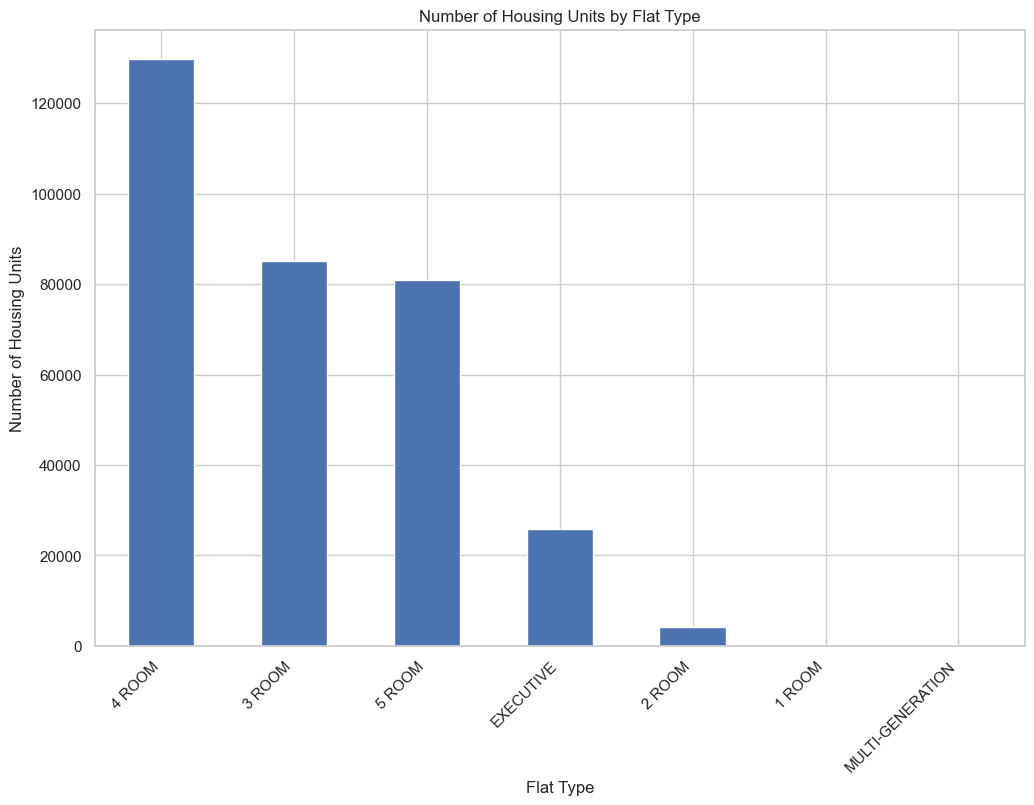

In [20]:
# bar chart for flat_type

# count the occurrences of each flat_type
flat_type_counts = data_hdb_last15['flat_type'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
flat_type_counts.plot(kind='bar')
plt.title('Number of Housing Units by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Number of Housing Units')
plt.xticks(rotation=45, ha='right')
plt.show()

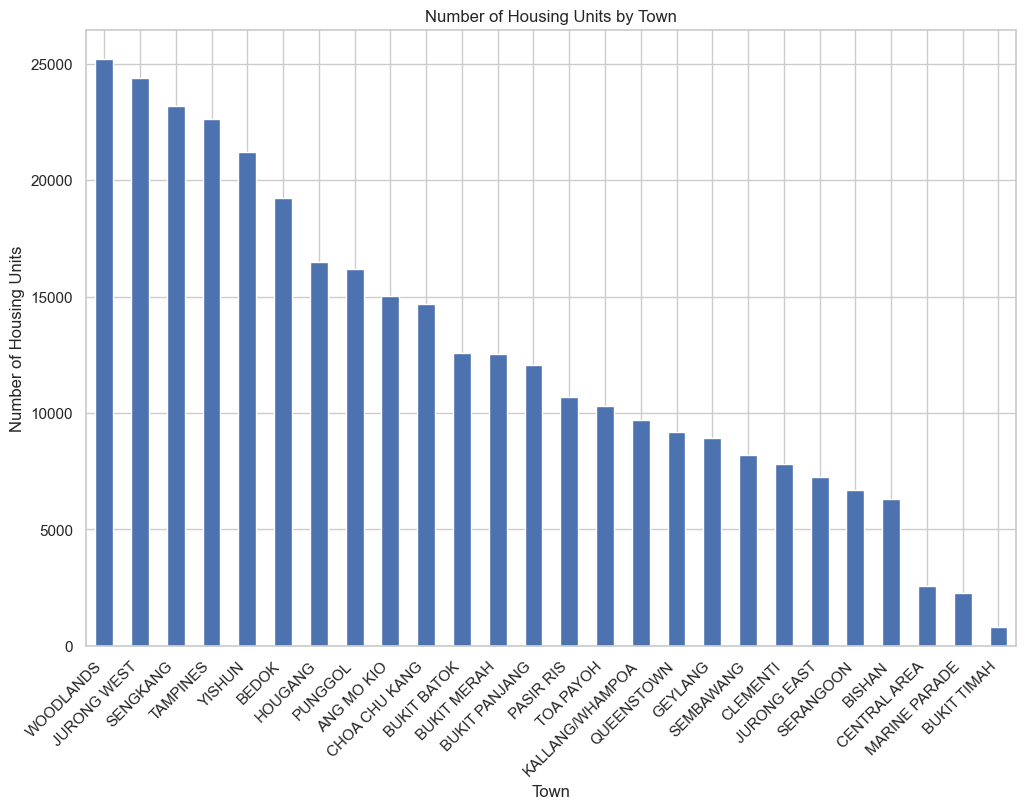

In [21]:
# bar chart for town

# count the occurrences of each town
town_counts = data_hdb_last15['town'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
town_counts.plot(kind='bar')
plt.title('Number of Housing Units by Town')
plt.xlabel('Town')
plt.ylabel('Number of Housing Units')
plt.xticks(rotation=45, ha='right')
plt.show()

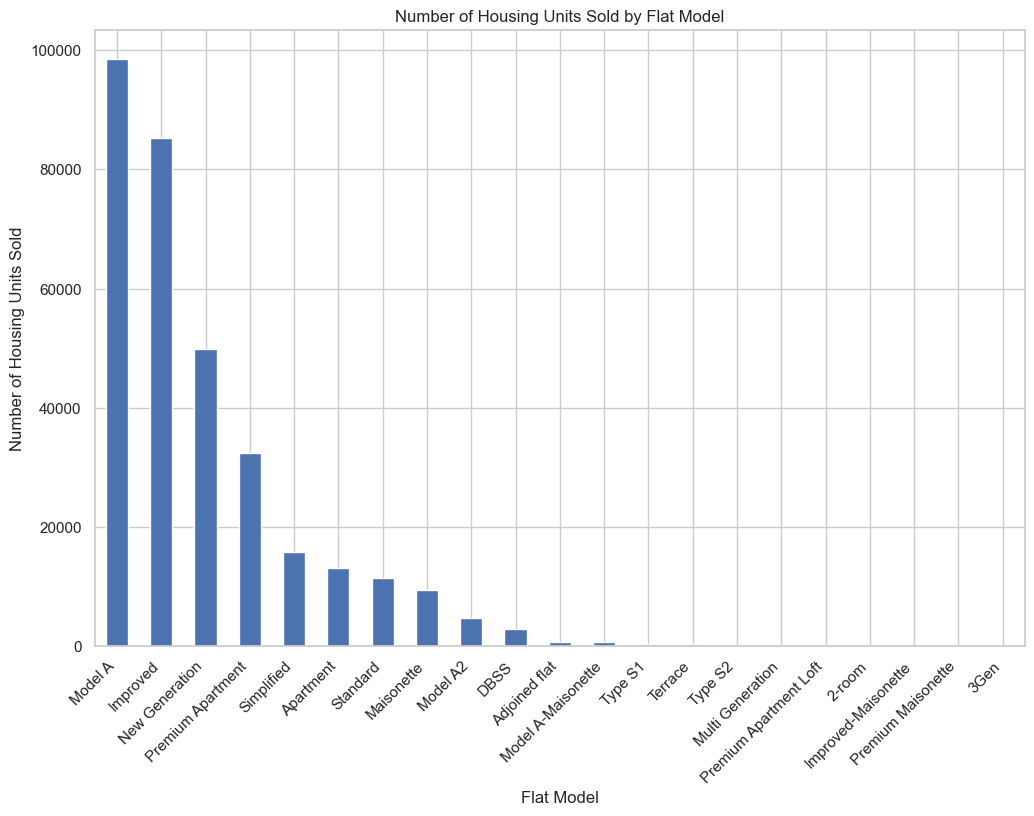

In [25]:
# bar chart for flat model

# count the occurrences of each flat_model
flat_model_counts = data_hdb_last15['flat_model'].value_counts()

# size
plt.figure(figsize=(12, 8))

# sort
flat_model_counts = flat_model_counts.sort_values(ascending=False)

# plot
flat_model_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

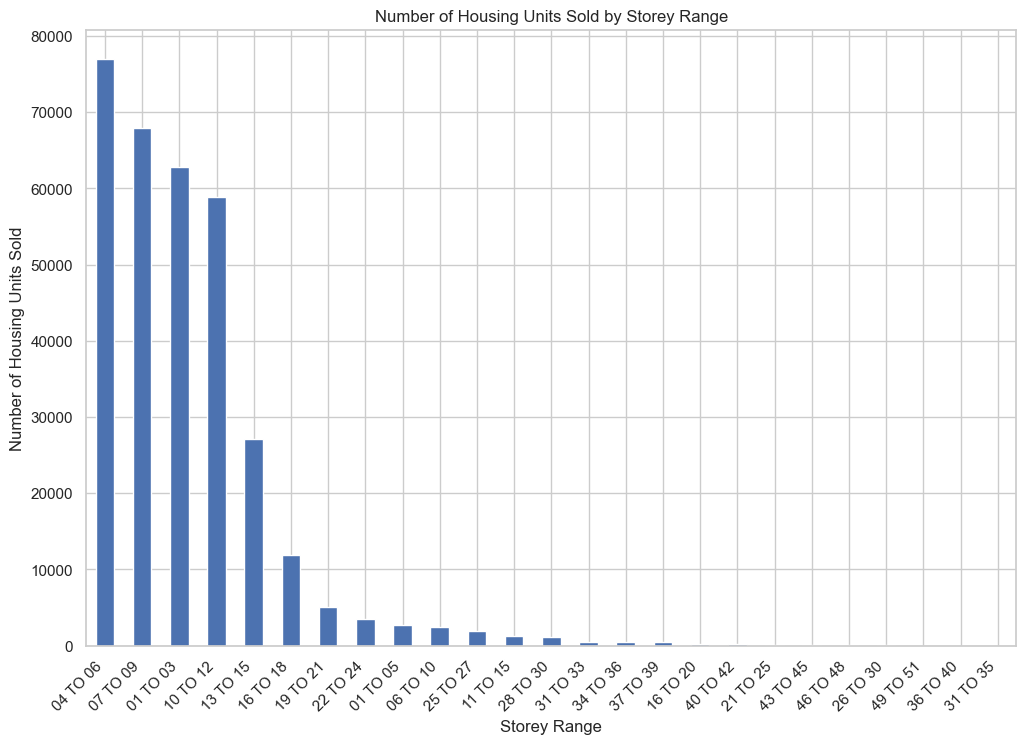

In [22]:
# bar chart for storey_range

# count the occurrences of each storey_range
story_counts = data_hdb_last15['storey_range'].value_counts()

# size
plt.figure(figsize=(12, 8))

# plot
story_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Storey Range')
plt.xlabel('Storey Range')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

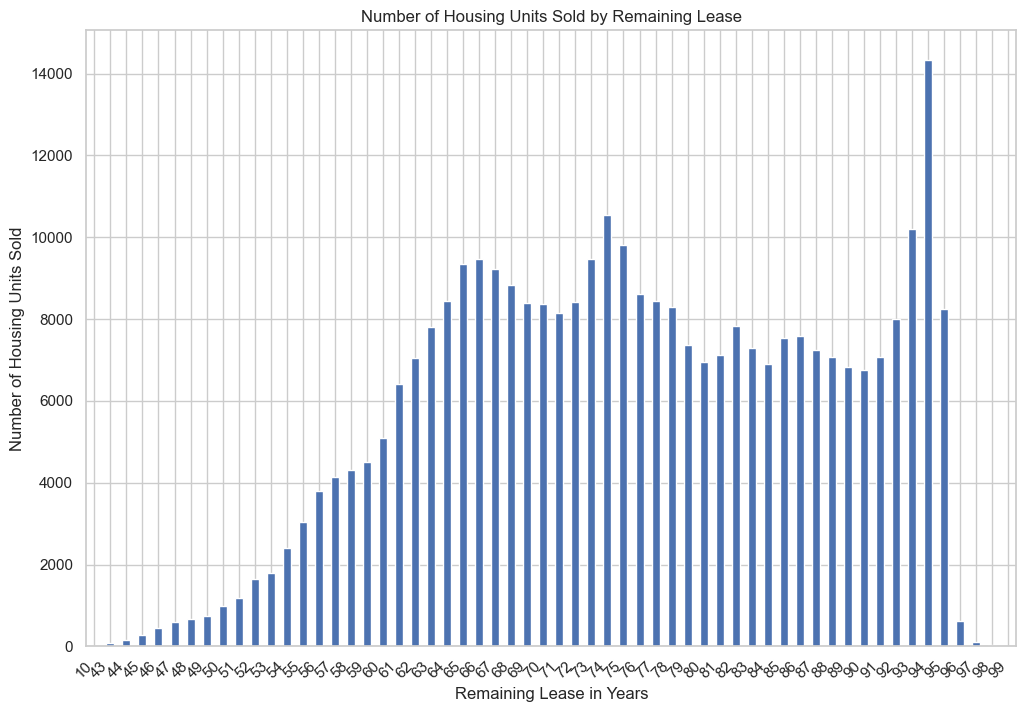

In [23]:
# the remaining_lease column contains text e.g 68 year 08 months
# get the first 2 digits to get the years remaining in lease
data_hdb_last15['first_two_digits'] = data_hdb_last15['remaining_lease'].astype(str).str[:2]

# count the occurrences of each remaining_lease
remaining_years_counts = data_hdb_last15['first_two_digits'].value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
remaining_years_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Remaining Lease')
plt.xlabel('Remaining Lease in Years')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

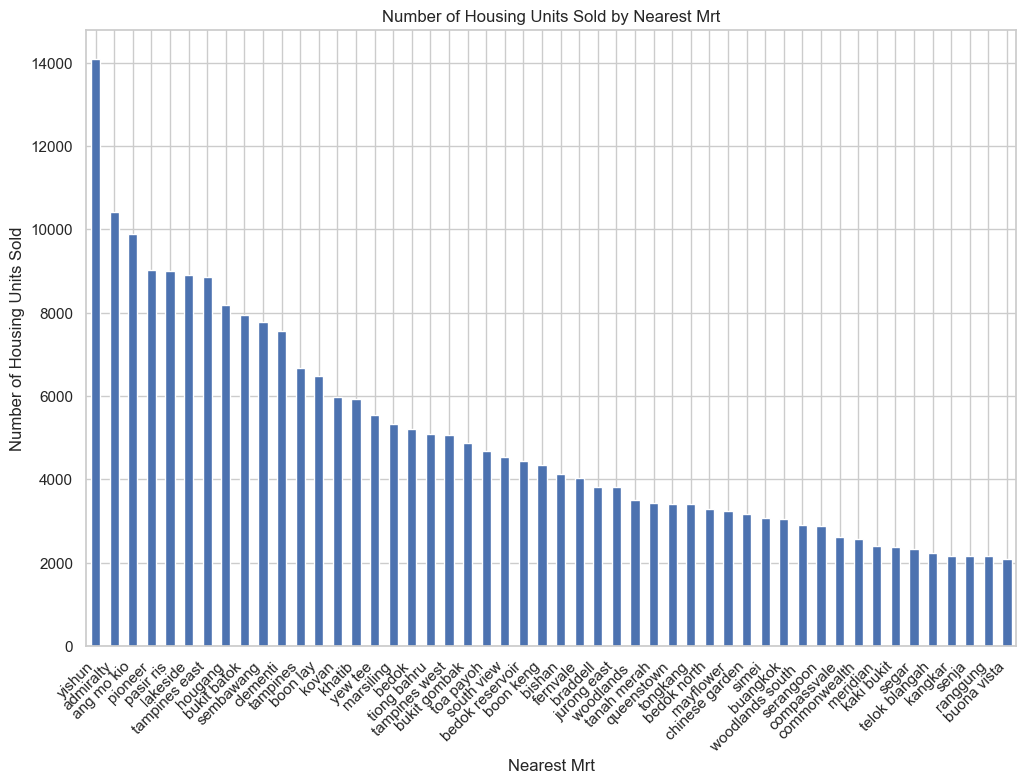

In [24]:
# bar chart for nearest_mrt

# count the occurrences for each mrt, filter top 50 as there are too many
nearest_mrt_counts = data_hdb_last15['nearest_mrt'].value_counts().head(50)

# size
plt.figure(figsize=(12, 8))

# plot
nearest_mrt_counts.plot(kind='bar')
plt.title('Number of Housing Units Sold by Nearest Mrt')
plt.xlabel('Nearest Mrt')
plt.ylabel('Number of Housing Units Sold')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Numerical Variables

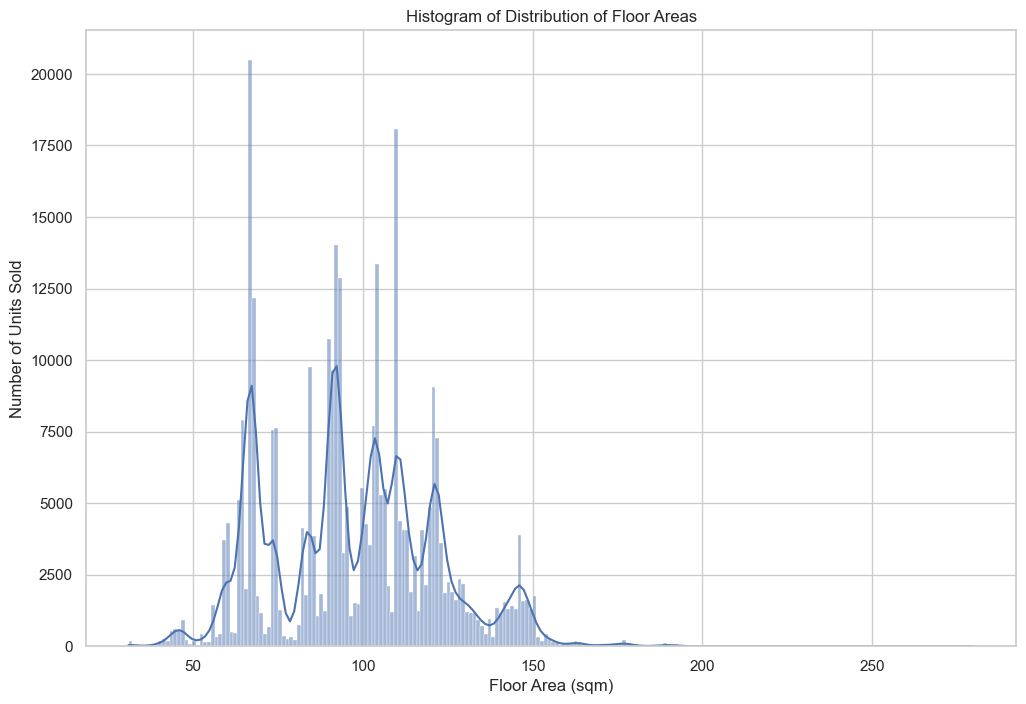

In [26]:
# histogram for floor area

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_last15['floor_area_sqm'], kde=True)
plt.title('Histogram of Distribution of Floor Areas')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Number of Units Sold')
plt.show()

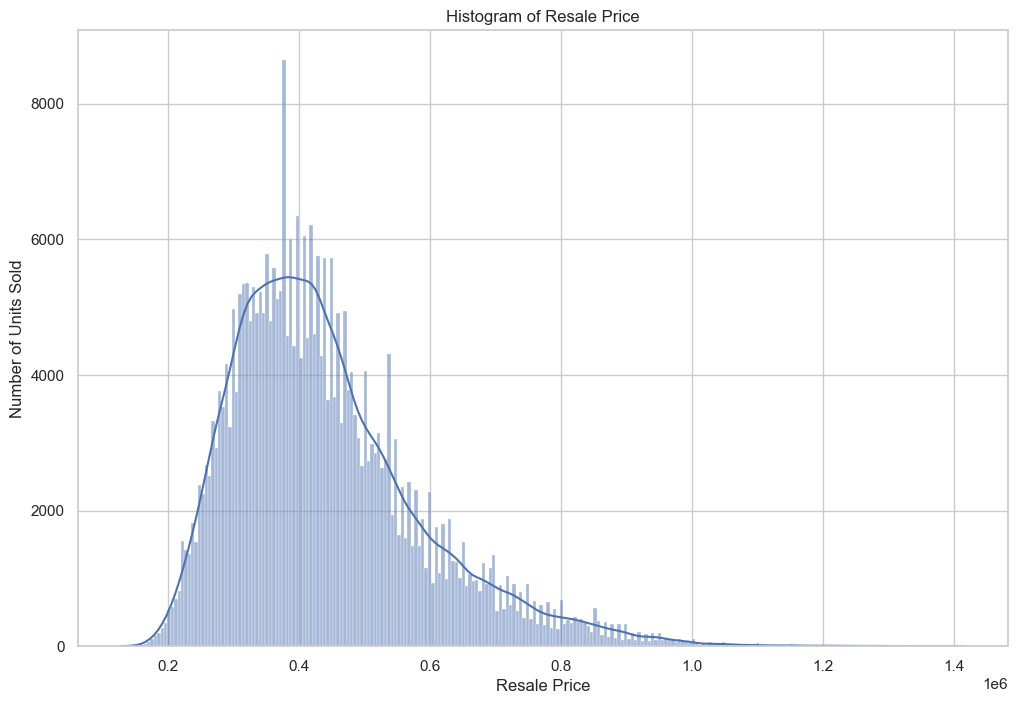

In [27]:
# histogram for resale_price

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_last15['resale_price'], kde=True)
plt.title('Histogram of Resale Price')
plt.xlabel('Resale Price')
plt.ylabel('Number of Units Sold')
plt.show()

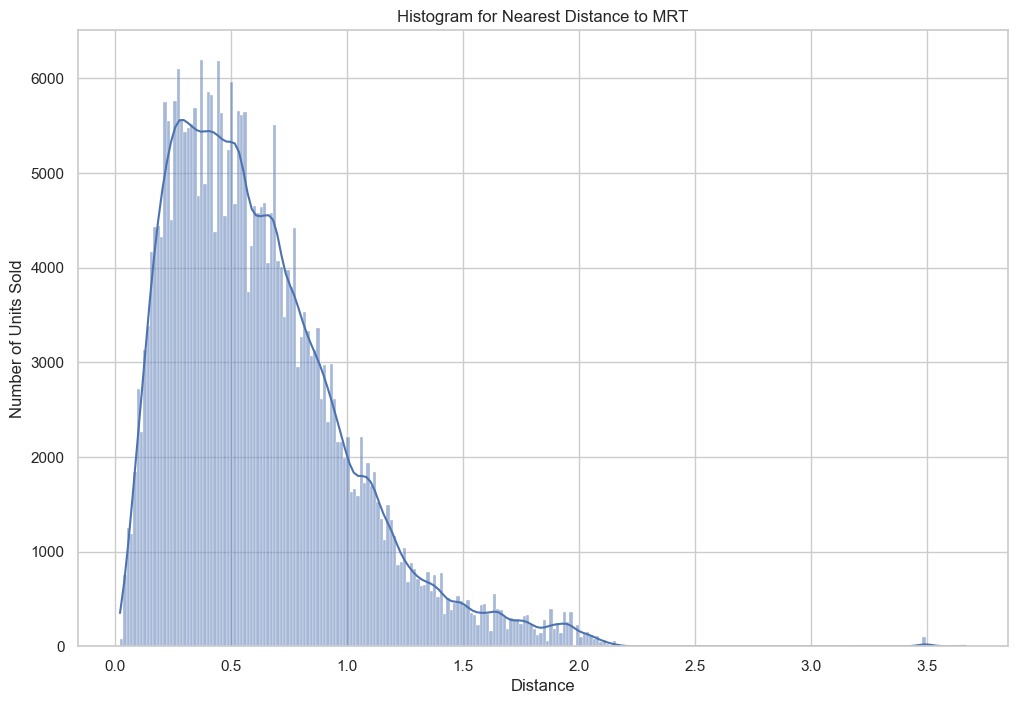

In [28]:
# histogram for nearest_distance_to_mrt

# size
plt.figure(figsize=(12, 8))

# plot
sns.histplot(data_hdb_last15['nearest_distance_to_mrt'], kde=True)
plt.title('Histogram for Nearest Distance to MRT')
plt.xlabel('Distance')
plt.ylabel('Number of Units Sold')
plt.show()

#### Time-Series

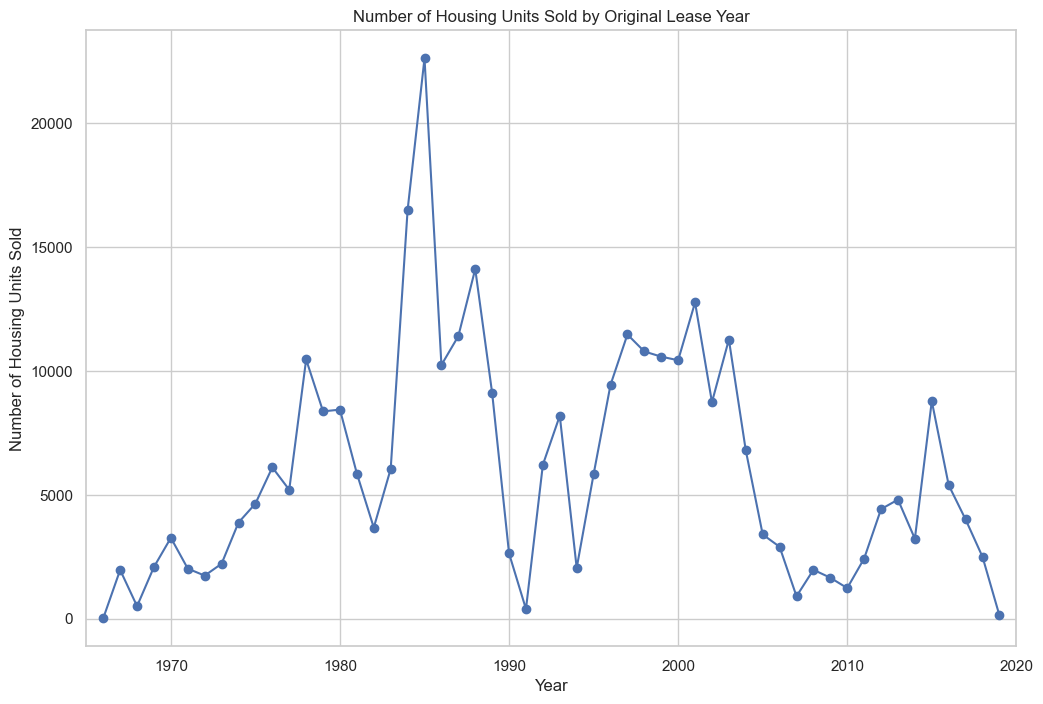

In [31]:
# time series chart for lease_commence_date

# count the occurrences of each lease_commence_date (year)
year_counts = data_hdb_last15['lease_commence_date'].value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
year_counts.plot(kind='line', marker='o')
plt.title('Number of Housing Units Sold by Original Lease Year')
plt.xlabel('Year')
plt.ylabel('Number of Housing Units Sold')
plt.xlim('1965', '2020')
plt.show()

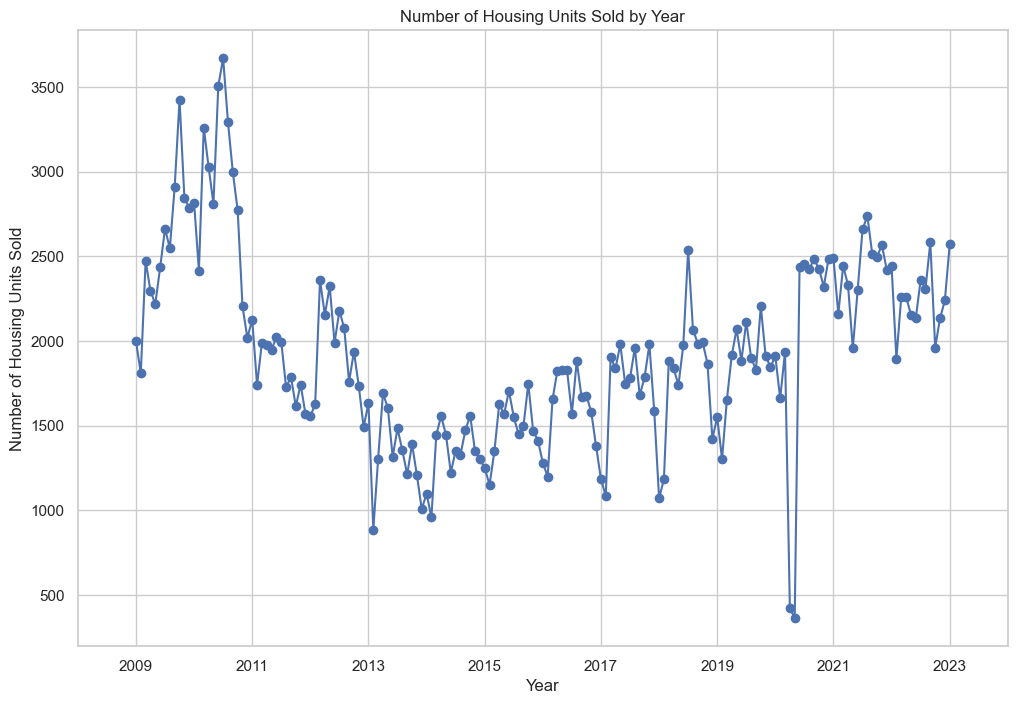

In [35]:
# time series chart for month

# count the occurrences of each lease_commence_date (year)
year_counts = data_hdb_last15['month'].value_counts().sort_index()

# size
plt.figure(figsize=(12, 8))

# plot
year_counts.plot(kind='line', marker='o')
plt.title('Number of Housing Units Sold by Year')
plt.xlabel('Year')
plt.ylabel('Number of Housing Units Sold')
plt.xlim('2008', '2024')
plt.show()

### Outlier Analysis

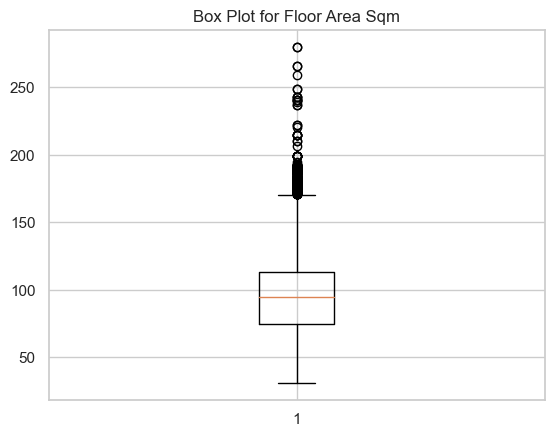

Skewness: 0.26709546061195477
Kurtosis: -0.20707553621976604


In [36]:
# floor_area_sqm 

# box plot
plt.title('Box Plot for Floor Area Sqm')
plt.boxplot(data_hdb_last15['floor_area_sqm'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['floor_area_sqm'])
kurt = kurtosis(data_hdb_last15['floor_area_sqm'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

#----------------------------------------------------------
# remove outlier rows

#Q1 = data_hdb_raw['floor_area_sqm'].quantile(0.25)
#Q3 = data_hdb_raw['floor_area_sqm'].quantile(0.75)

#IQR = Q3 - Q1
#data_hdb_raw = data_hdb_raw[(data_hdb_raw['floor_area_sqm']>Q1-1.5*IQR) & (data_hdb_raw['floor_area_sqm']<Q3+1.5*IQR)]

# --------------------------OR-----------------------------
# replace outlier values with mean

# define threshold (1.5 times IQR) for outliers
#outlier_threshold = 1.5

# replace outlier values with mean
#data_hdb_raw['floor_area_sqm'] = data_hdb_raw['floor_area_sqm'].where(
#  (data_hdb_raw['floor_area_sqm']>=Q1-outlier_threshold*IQR) &
#    (data_hdb_raw['floor_area_sqm']<=Q3+outlier_threshold*IQR),
#    data_hdb_raw['floor_area_sqm'].mean()
#)

# --------------------------OR-----------------------------
# replace outlier with mean of the chosen type(mean based on the floor_area_sqm of the different flat type / models)


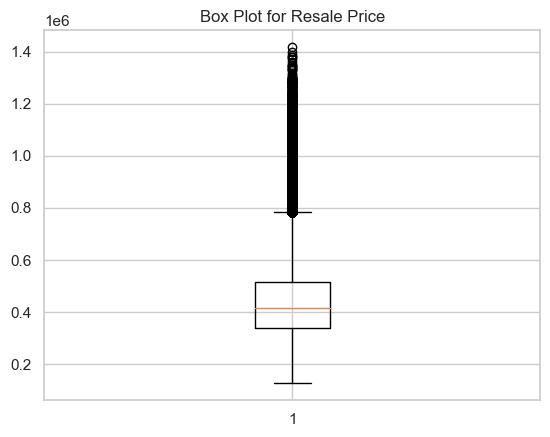

Skewness: 1.1336240445853314
Kurtosis: 1.6984390327605166


In [37]:
# resale price

# box plot
plt.title('Box Plot for Resale Price')
plt.boxplot(data_hdb_last15['resale_price'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['resale_price'])
kurt = kurtosis(data_hdb_last15['resale_price'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

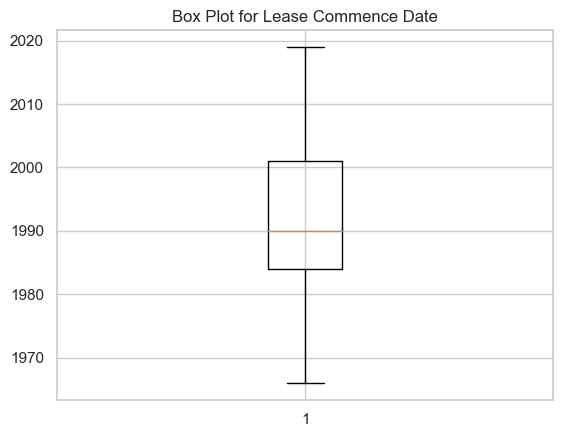

Skewness: 0.23726480066867828
Kurtosis: -0.7236042846328328


In [38]:
# lease_commence_date
data_hdb_last15['lease_commence_date'] = data_hdb_last15['lease_commence_date'].dt.year.astype(int)

# box plot
plt.title('Box Plot for Lease Commence Date')
plt.boxplot(data_hdb_last15['lease_commence_date'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['lease_commence_date'])
kurt = kurtosis(data_hdb_last15['lease_commence_date'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

In [ ]:
# remaining_lease

# the remaining_lease column contains text e.g 68 year 08 months
# get the first 2 digits to get the years remaining in lease
# must reset data_hdb_raw each time as remaining_lease column will be a float the 2nd time its run
# data_hdb_raw['remaining_lease'] = data_hdb_raw['remaining_lease'].str[:2].astype(float)

# box plot
plt.title('Box Plot for Remaining Lease')
plt.boxplot(data_hdb_last15['remaining_lease'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['remaining_lease'])
kurt = kurtosis(data_hdb_last15['remaining_lease'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

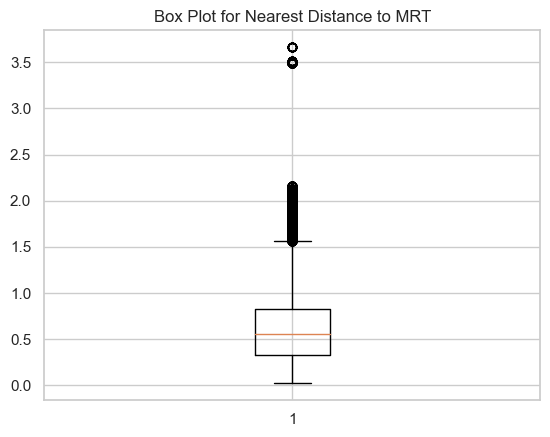

Skewness: 1.186555427957242
Kurtosis: 2.2471214233119223


In [40]:
# nearest_distance_to_mrt

# box plot
plt.title('Box Plot for Nearest Distance to MRT')
plt.boxplot(data_hdb_last15['nearest_distance_to_mrt'])
plt.show()

# kurtosis and skew
skewness = skew(data_hdb_last15['nearest_distance_to_mrt'])
kurt = kurtosis(data_hdb_last15['nearest_distance_to_mrt'])

print(f"Skewness: {skewness}")
print(f"Kurtosis: {kurt}")

### Correlation Analysis

                resale_price  floor_area_sqm
resale_price        1.000000        0.615073
floor_area_sqm      0.615073        1.000000


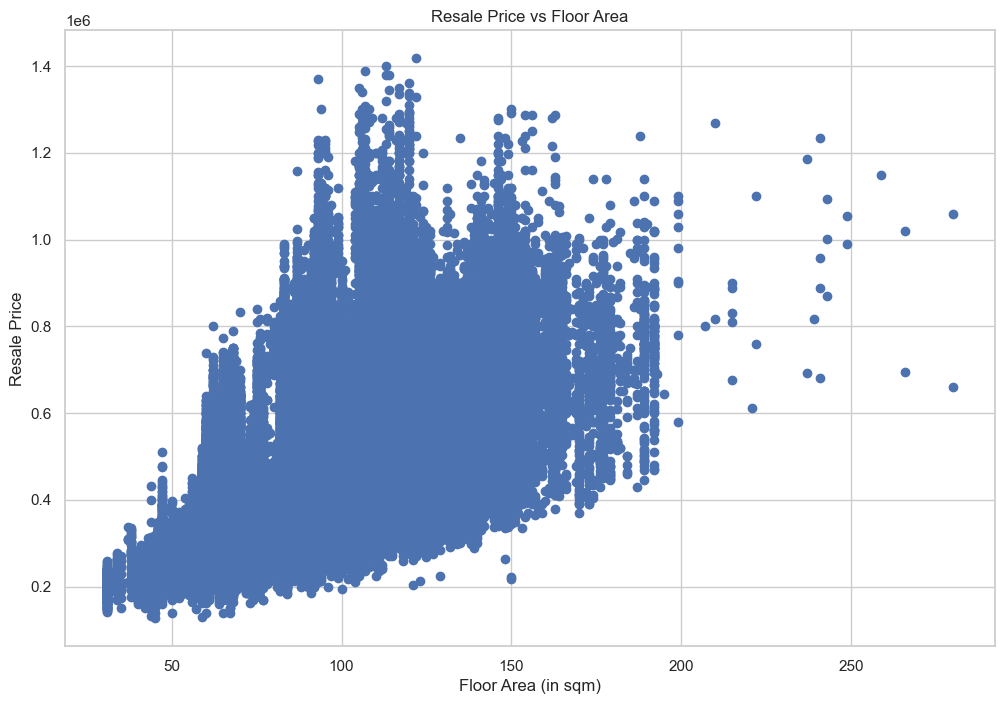

In [41]:
# Finding Correlation between Numerical Features

# resale price vs floor area 
# correlation coefficient
print(data_hdb_last15[['resale_price','floor_area_sqm']].corr())

# scatterplot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_last15['floor_area_sqm'], data_hdb_last15['resale_price'])
plt.xlabel('Floor Area (in sqm)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Floor Area')
plt.show()

                         resale_price  nearest_distance_to_mrt
resale_price                 1.000000                -0.136573
nearest_distance_to_mrt     -0.136573                 1.000000


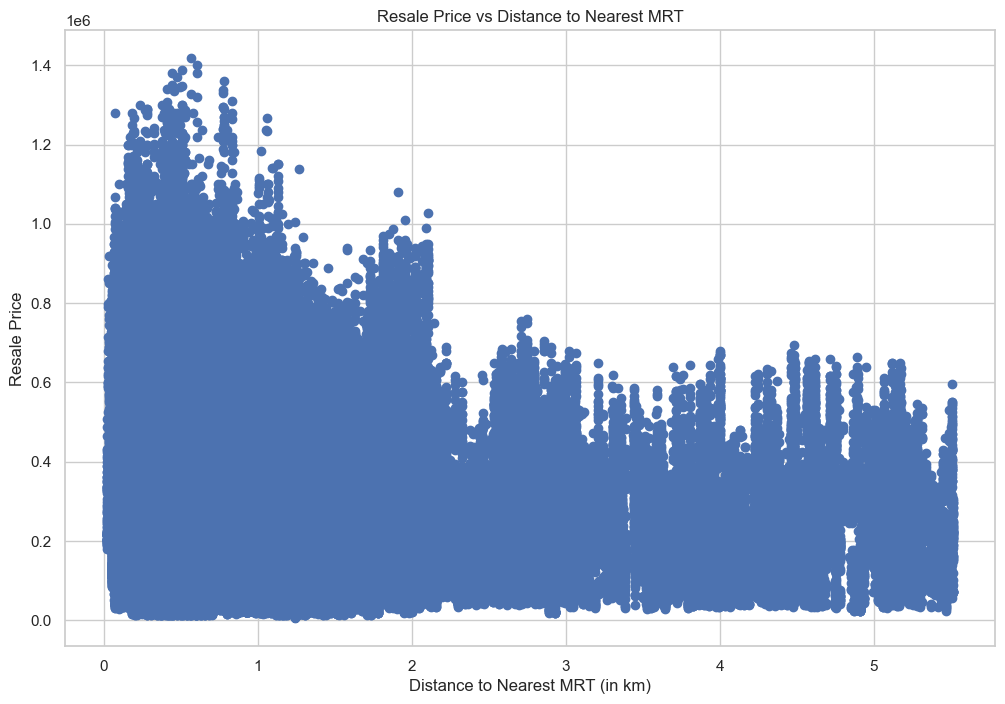

In [32]:
# resale price vs nearest distance to mrt
# correlation coefficient
print(data_hdb_raw[['resale_price','nearest_distance_to_mrt']].corr())

# scatter plot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_raw['nearest_distance_to_mrt'], data_hdb_raw['resale_price'])
plt.xlabel('Distance to Nearest MRT (in km)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Distance to Nearest MRT')
plt.show()

In [35]:
# resale price vs remaining lease
# conversion of data type for remaining lease
# def convert_year_to_float(value):
#    if isinstance(value, int):
#        value = str(value)
#    match = re.match(r'(\d+)(?: years (\d+) months)?', value)
#    years = int(match.group(1))
#    months = int(match.group(2)) if match.group(2) else 0
#    return years + months / 12

# data_hdb_raw['remaining_lease'] = data_hdb_raw['remaining_lease'].apply(convert_year_to_float)

In [ ]:
# correlation coefficient
print(data_hdb_last15[['resale_price','remaining_lease']].corr())

# scatter plot
plt.figure(figsize=(12,8))
plt.scatter(data_hdb_last15['remaining_lease'], data_hdb_last15['resale_price'])
plt.xlabel('Remaining Lease (in years)')
plt.ylabel('Resale Price')
plt.title('Resale Price vs Remaining Lease')
plt.show()

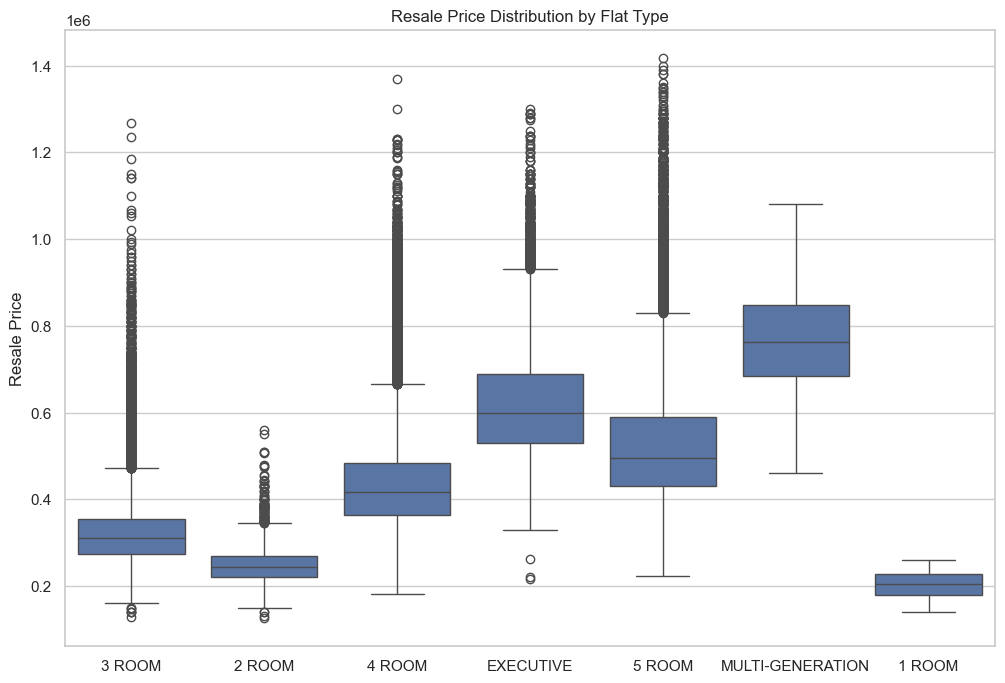

In [43]:
# Relationship between Categorical Features

# flat type vs resale price
plt.figure(figsize=(12, 8))
sns.boxplot(x='flat_type', y='resale_price', data=data_hdb_last15)
plt.xlabel('')
plt.ylabel('Resale Price')
plt.title('Resale Price Distribution by Flat Type')
plt.show()

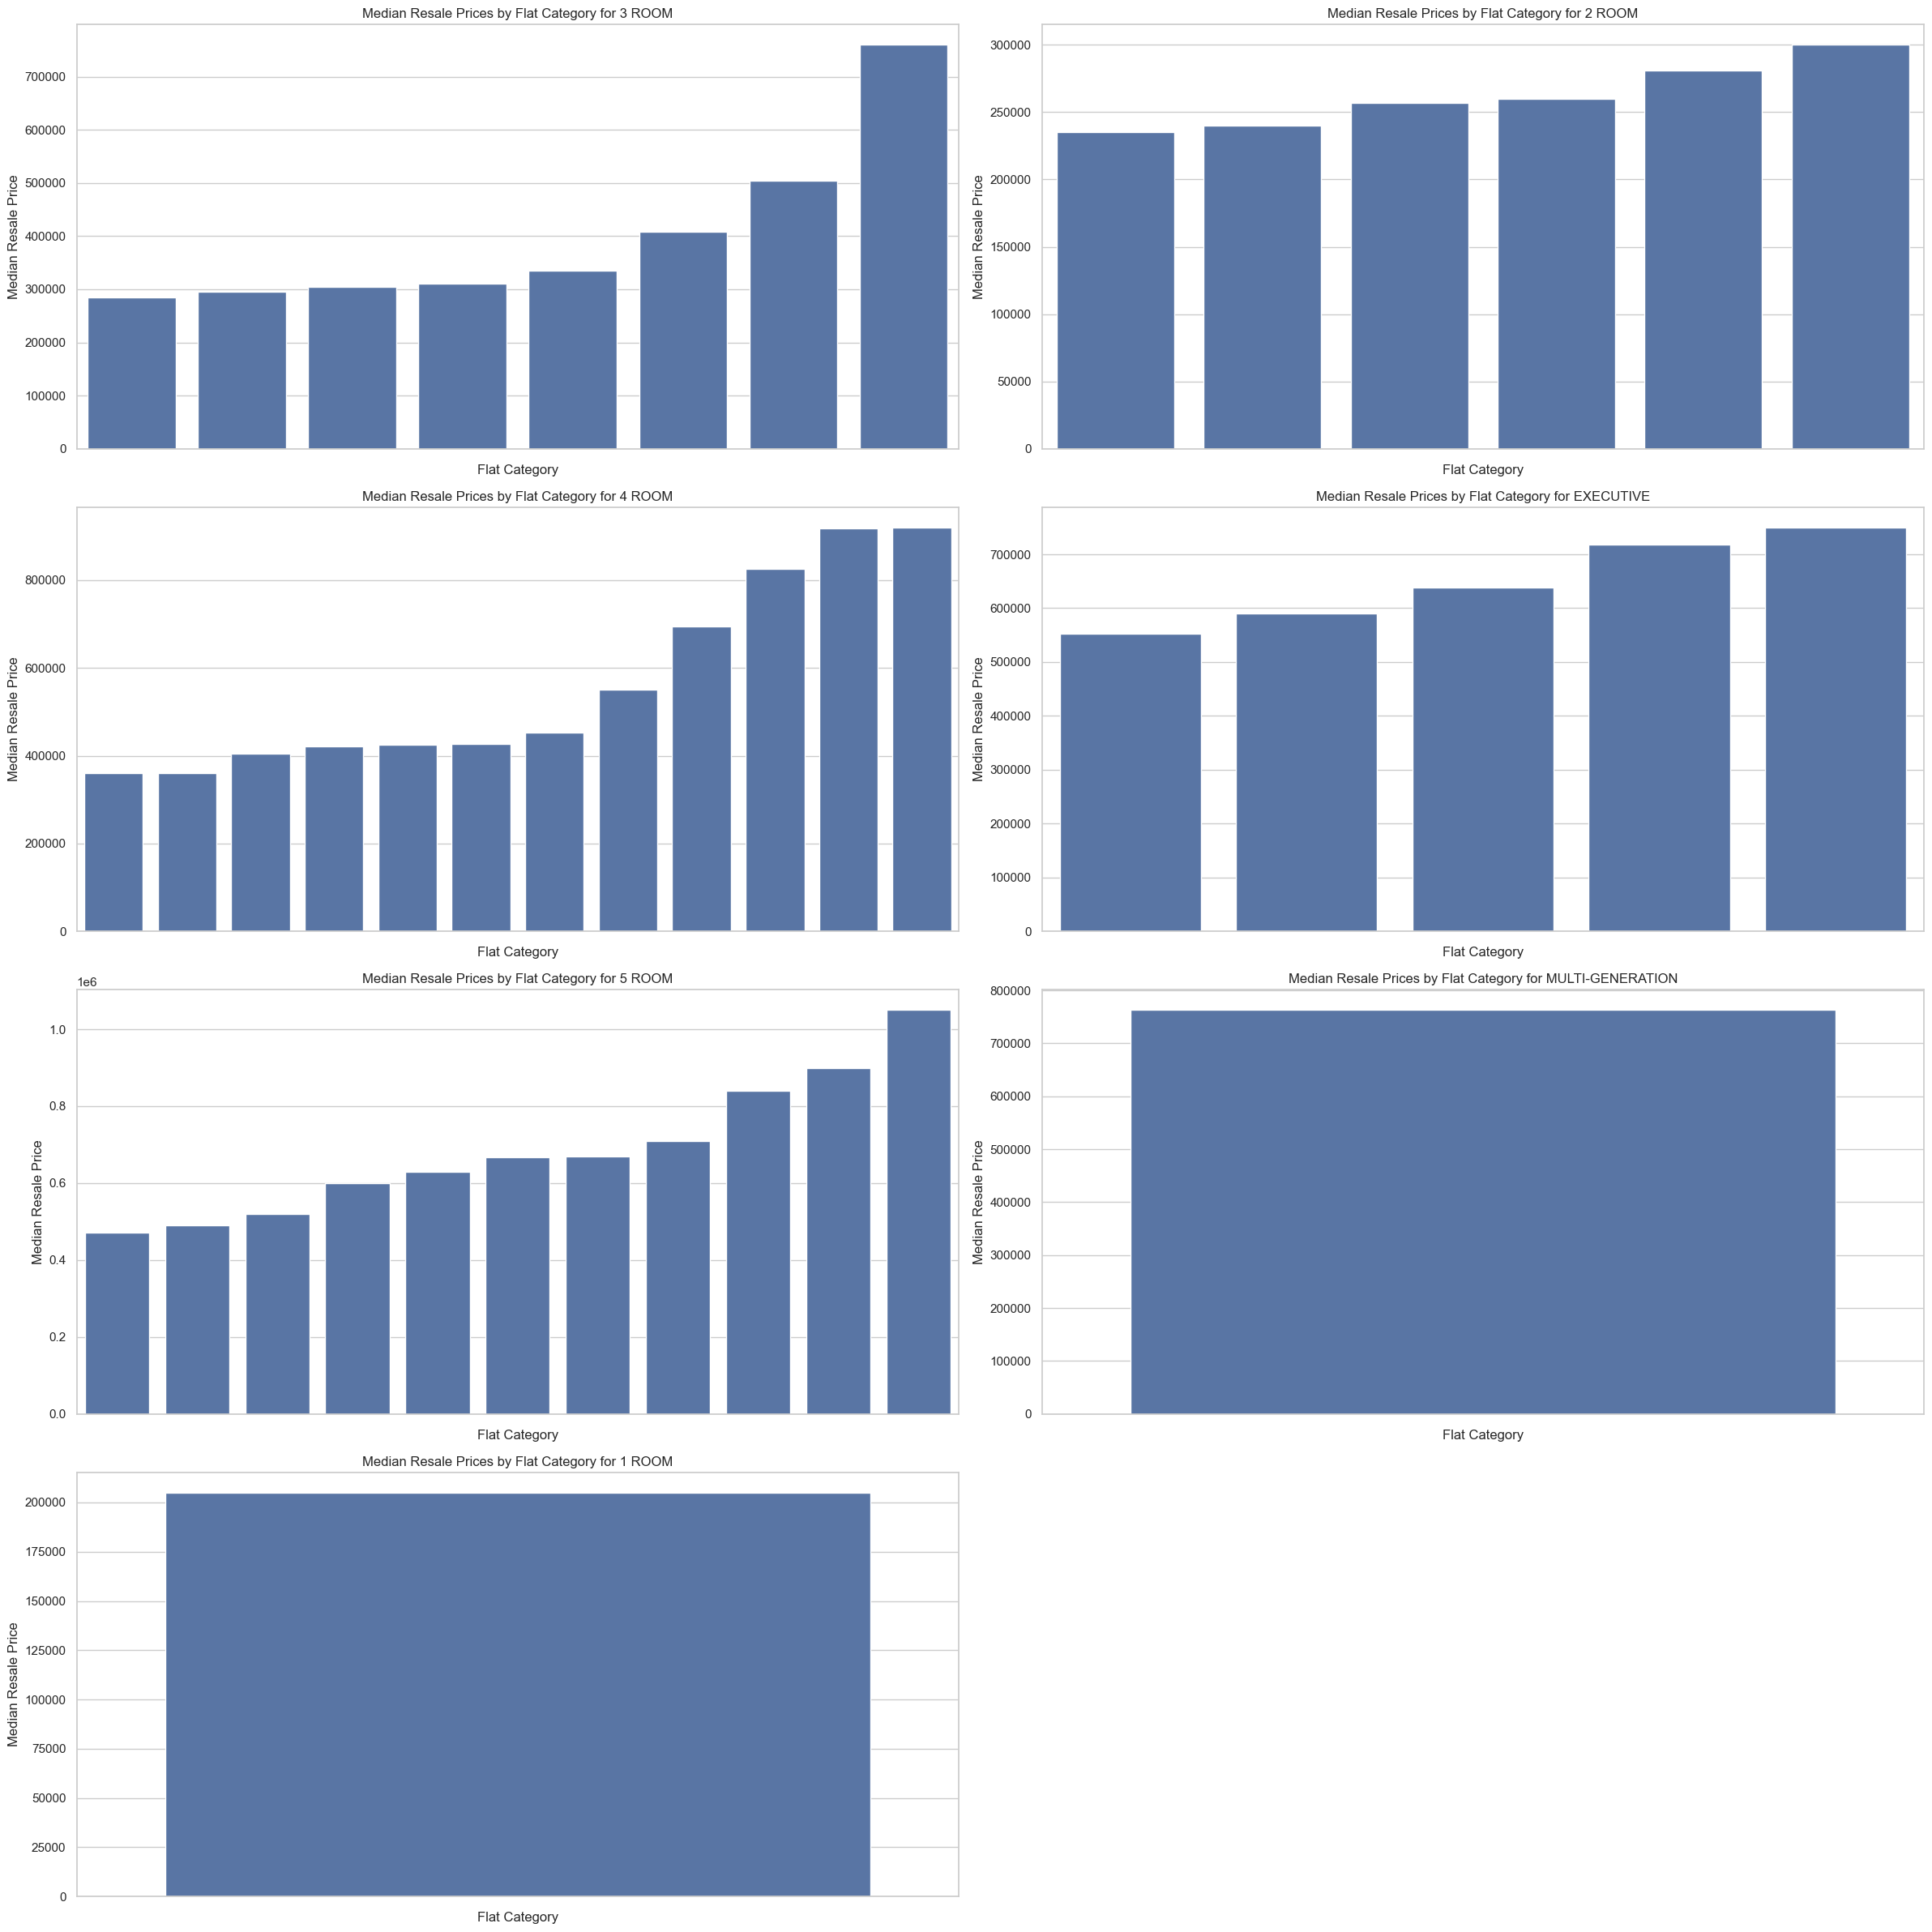

In [44]:
# Finding the median resale prices across flat models for each flat type
unique_flat_types = data_hdb_last15['flat_type'].unique()

num_plots = 7
num_cols = 2
num_rows = 4

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12*num_cols, 6*num_rows))

for i, flat_type in enumerate(unique_flat_types):
    row_idx = i // num_cols
    col_idx = i % num_cols
    ax = axes[row_idx, col_idx] if num_plots > 1 else axes
    filtered_data = data_hdb_last15[data_hdb_last15['flat_type'] == flat_type]
    median_resale_prices = filtered_data.groupby('flat_category')['resale_price'].median().reset_index().sort_values(by='resale_price')
    sns.barplot(x='flat_category', y='resale_price', data=median_resale_prices, ax=ax) 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_title(f'Median Resale Prices by Flat Category for {flat_type}')
    ax.set_xlabel('Flat Category') 
    ax.set_ylabel('Median Resale Price')

for ax in axes.flatten()[len(unique_flat_types):]:
    ax.axis('off')
    
plt.tight_layout()
plt.show()


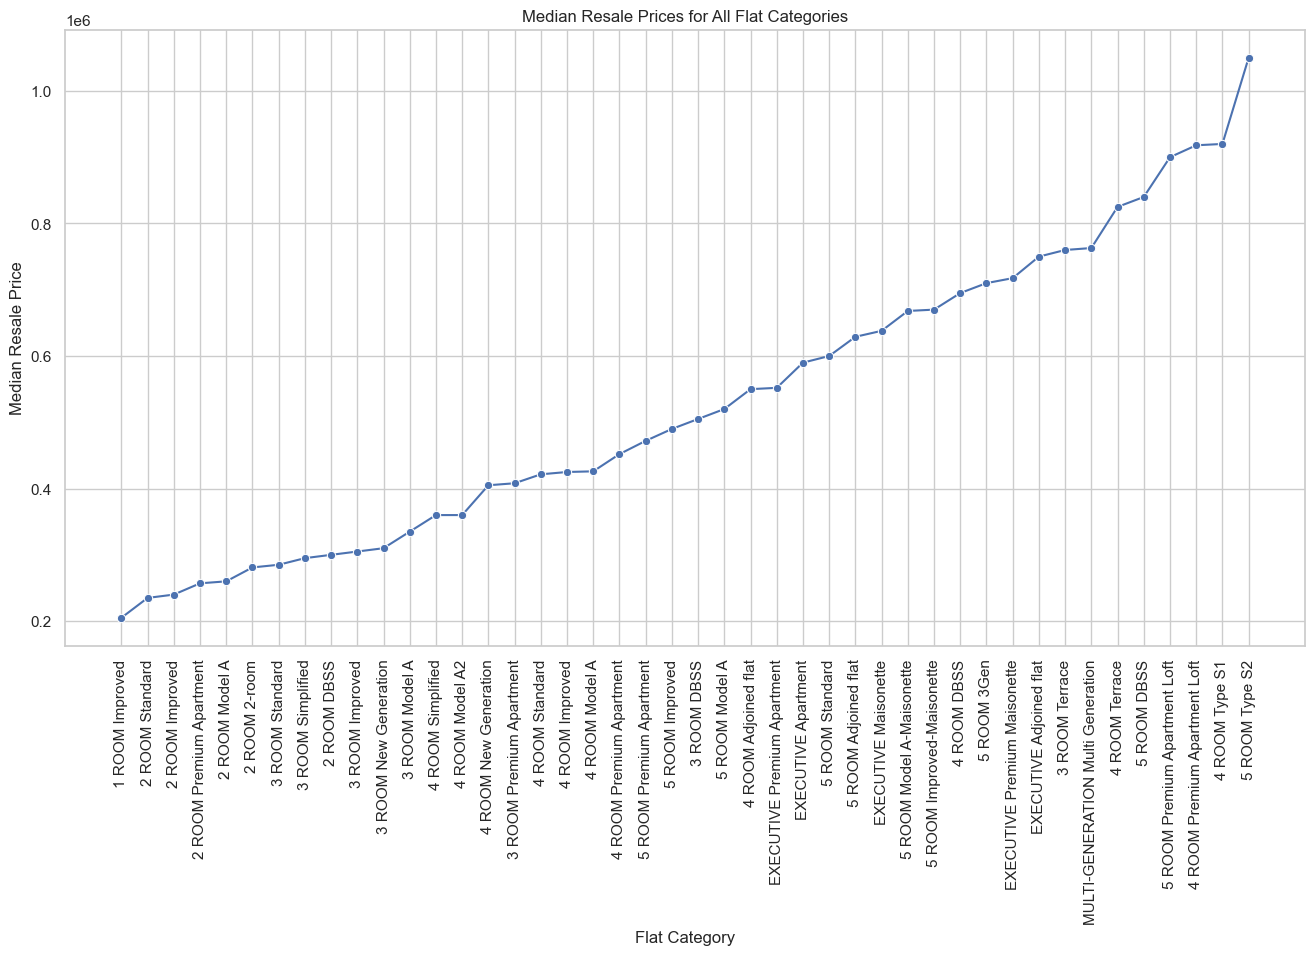

In [45]:
# Finding the median resale prices across all flat categories
median_resale_prices_all = data_hdb_last15.groupby(['flat_category'])['resale_price'].median().reset_index()
median_resale_prices_all = median_resale_prices_all.sort_values(by='resale_price')

# plot the aggregated data
plt.figure(figsize=(16, 8))
sns.lineplot(x='flat_category', y='resale_price', data=median_resale_prices_all, marker='o')  
plt.xticks(rotation=90) 
plt.title('Median Resale Prices for All Flat Categories')  
plt.xlabel('Flat Category')  
plt.ylabel('Median Resale Price')  
plt.show()

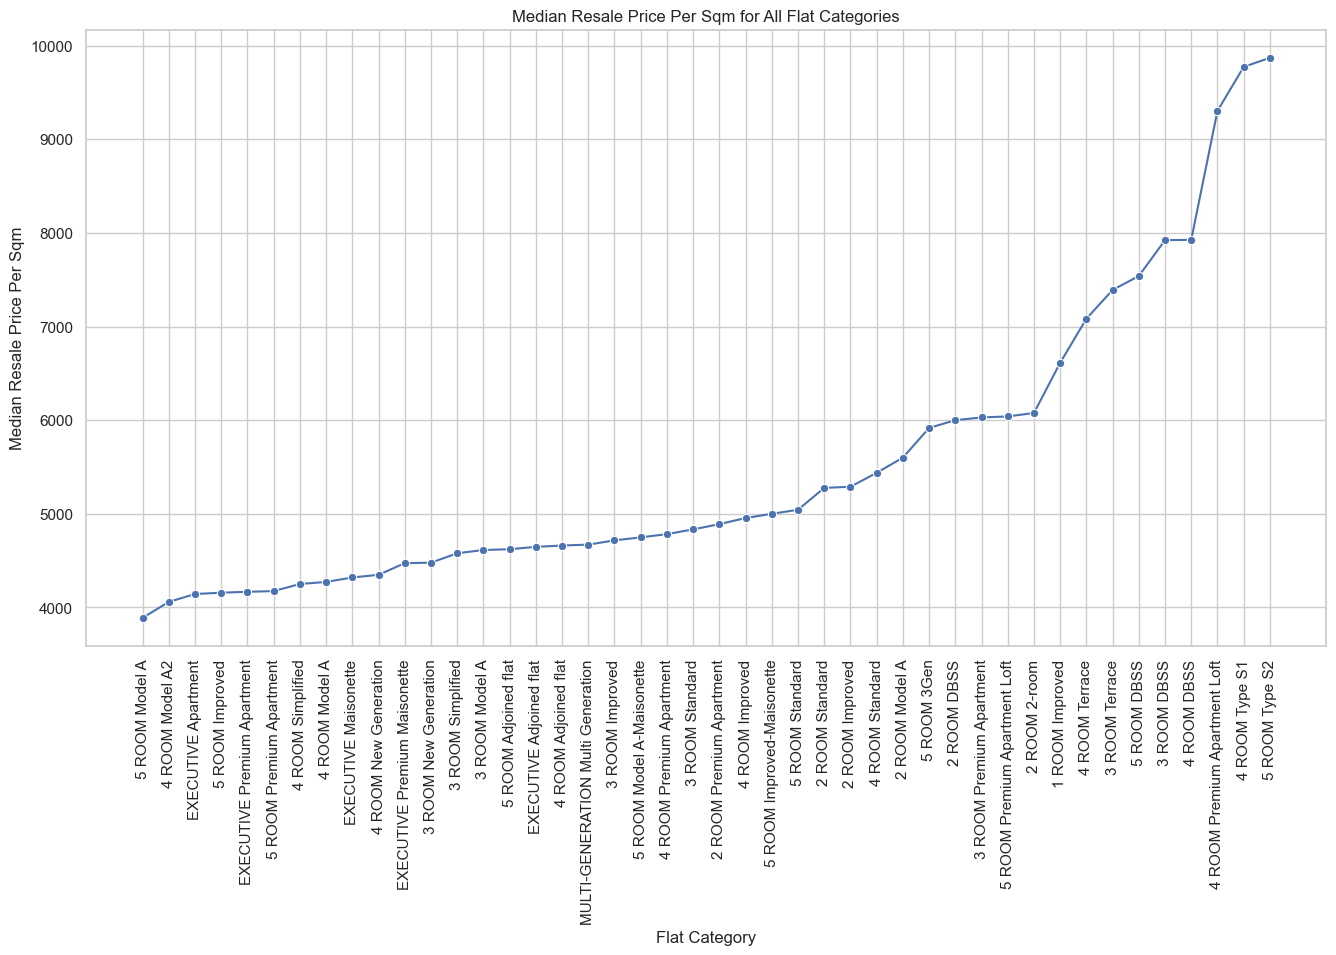

In [46]:
# Finding median resale price per sqm across all flat categories
data_hdb_last15['price_per_sqm'] = data_hdb_last15['resale_price'] / data_hdb_last15['floor_area_sqm']
median_pps_flat_cat = data_hdb_last15.groupby(['flat_category'])['price_per_sqm'].median().reset_index()
median_pps_flat_cat = median_pps_flat_cat.sort_values(by='price_per_sqm')

# plot the aggregated data
plt.figure(figsize=(16, 8))
sns.lineplot(x='flat_category', y='price_per_sqm', data=median_pps_flat_cat, marker='o')  
plt.xticks(rotation=90) 
plt.title('Median Resale Price Per Sqm for All Flat Categories')  
plt.xlabel('Flat Category')  
plt.ylabel('Median Resale Price Per Sqm')  
plt.show()

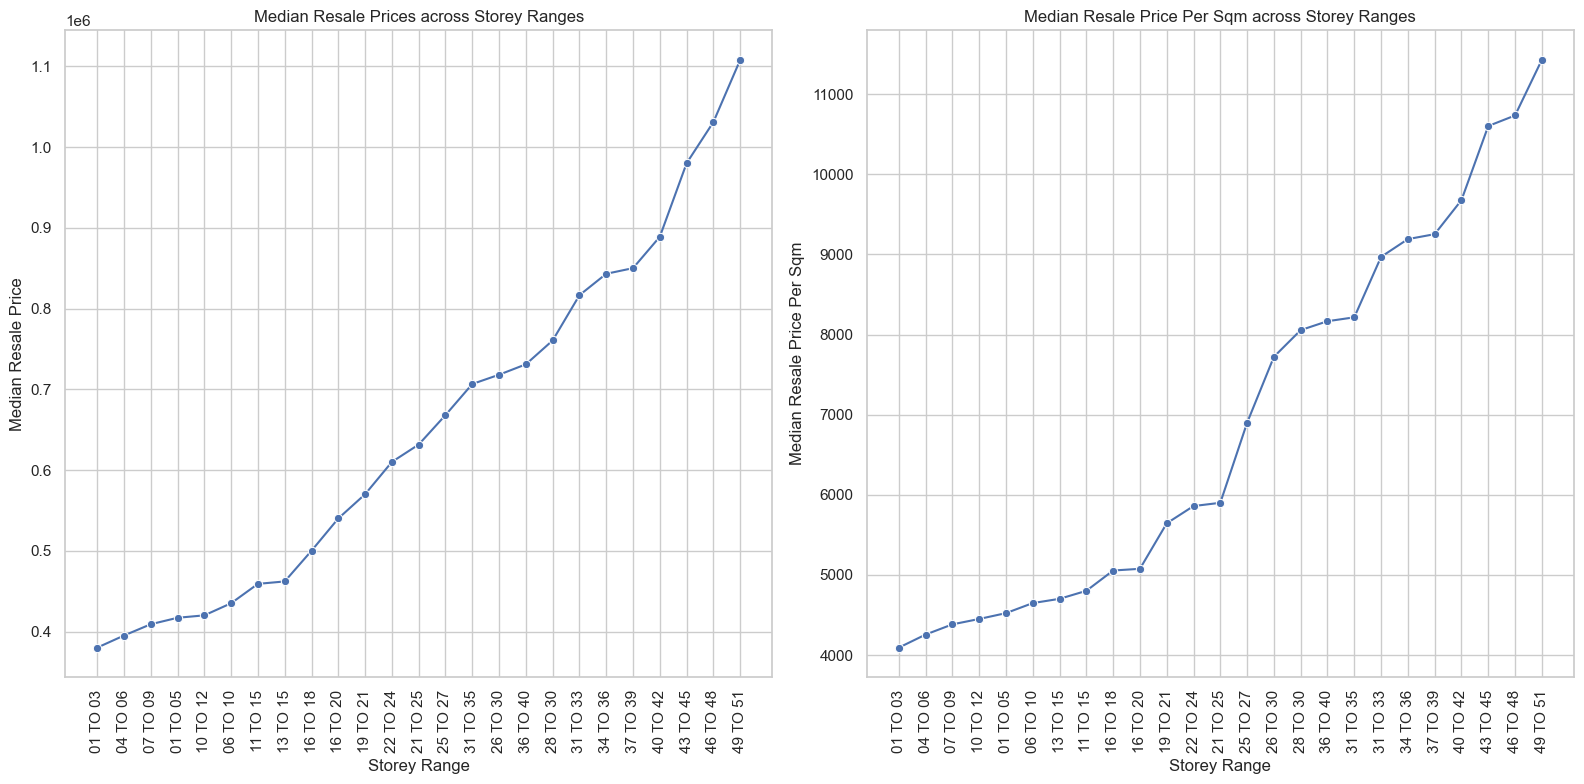

In [47]:
# Finding median resale prices across all storey range
median_resale_prices_storey = data_hdb_last15.groupby(['storey_range'])['resale_price'].median().reset_index()
median_resale_prices_storey = median_resale_prices_storey.sort_values(by='resale_price')

# Finding median resale price per sqm across all storey range
median_pps_storey = data_hdb_last15.groupby(['storey_range'])['price_per_sqm'].median().reset_index()
median_pps_storey = median_pps_storey.sort_values(by='price_per_sqm')

# Create a figure with two subplots arranged side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first aggregated data on the first subplot
sns.lineplot(x='storey_range', y='resale_price', data=median_resale_prices_storey, marker='o', ax=axes[0])  
axes[0].set_title('Median Resale Prices across Storey Ranges')  
axes[0].set_xlabel('Storey Range')  
axes[0].set_ylabel('Median Resale Price')  
axes[0].tick_params(axis='x', rotation=90)

# Plot the second aggregated data on the second subplot
sns.lineplot(x='storey_range', y='price_per_sqm', data=median_pps_storey, marker='o', ax=axes[1])  
axes[1].set_title('Median Resale Price Per Sqm across Storey Ranges')  
axes[1].set_xlabel('Storey Range')  
axes[1].set_ylabel('Median Resale Price Per Sqm')  
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

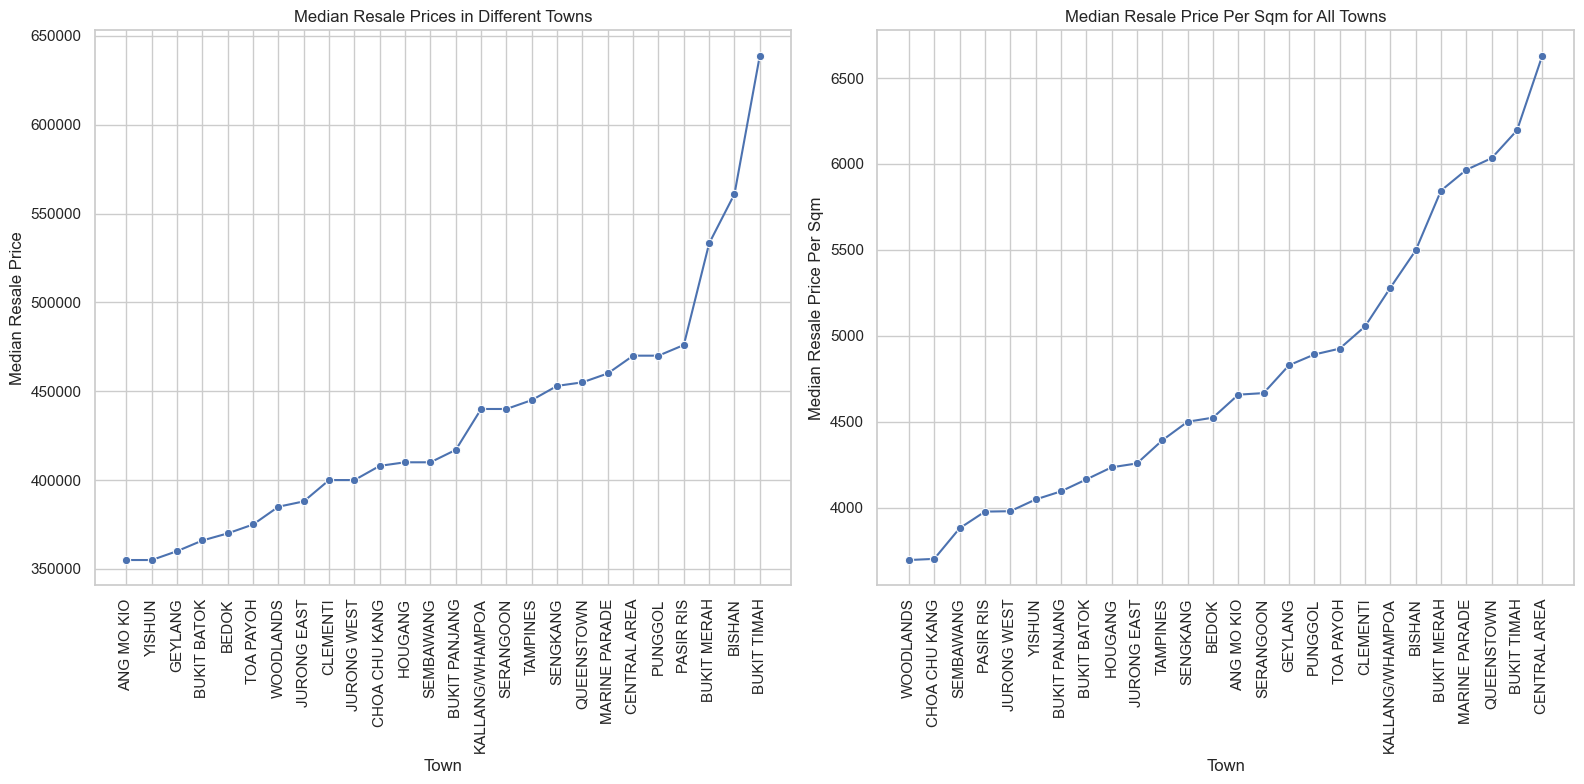

In [48]:
# Finding median resale prices across all towns
median_resale_prices_town = data_hdb_last15.groupby(['town'])['resale_price'].median().reset_index()
median_resale_prices_town = median_resale_prices_town.sort_values(by='resale_price')

# Finding median resale price per sqm across all towns
median_pps_town = data_hdb_last15.groupby(['town'])['price_per_sqm'].median().reset_index()
median_pps_town = median_pps_town.sort_values(by='price_per_sqm')

# Create a figure with two subplots arranged side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot the first aggregated data on the first subplot
sns.lineplot(x='town', y='resale_price', data=median_resale_prices_town, marker='o', ax=axes[0])  
axes[0].set_title('Median Resale Prices in Different Towns')  
axes[0].set_xlabel('Town')  
axes[0].set_ylabel('Median Resale Price')  
axes[0].tick_params(axis='x', rotation=90)

# Plot the second aggregated data on the second subplot
sns.lineplot(x='town', y='price_per_sqm', data=median_pps_town, marker='o', ax=axes[1])  
axes[1].set_title('Median Resale Price Per Sqm for All Towns')  
axes[1].set_xlabel('Town')  
axes[1].set_ylabel('Median Resale Price Per Sqm')  
axes[1].tick_params(axis='x', rotation=90)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

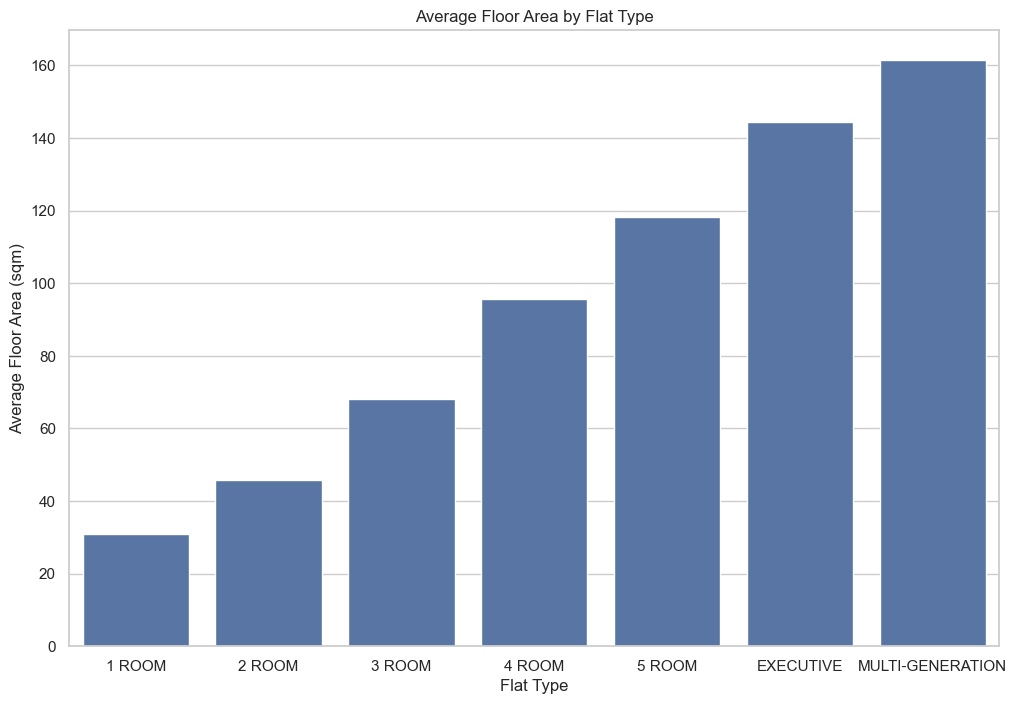

In [49]:
# calculate avg floor area for each flat_type
average_floor_area = data_hdb_last15.groupby('flat_type')['floor_area_sqm'].mean().reset_index()

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='flat_type', y='floor_area_sqm', data=average_floor_area)
plt.title('Average Floor Area by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Floor Area (sqm)')
plt.show()

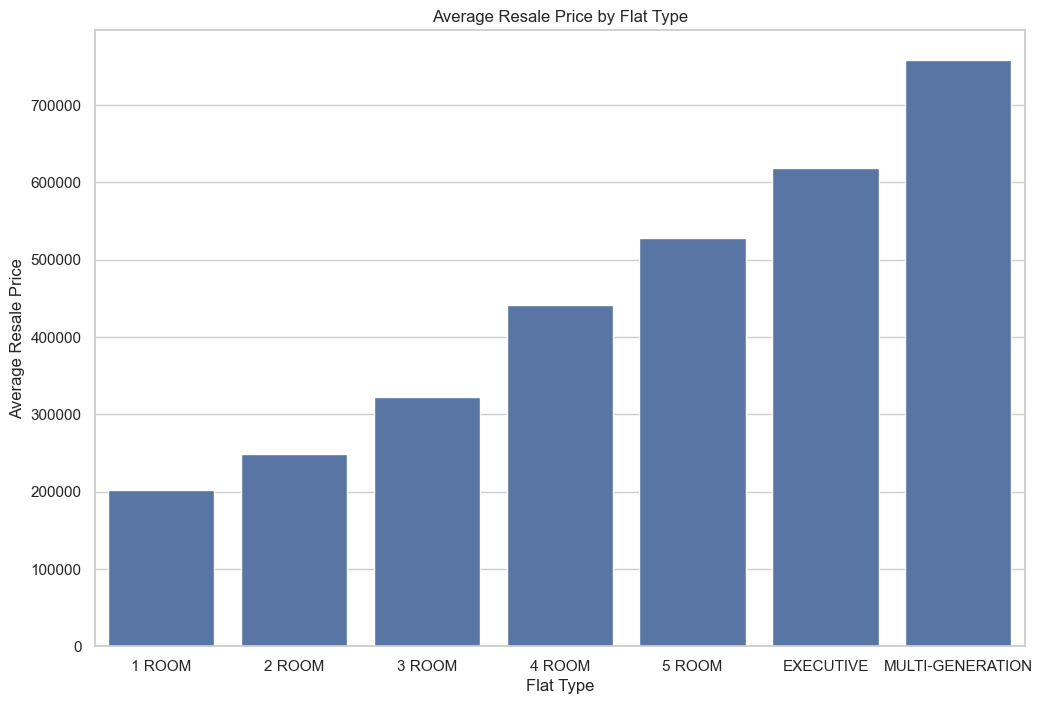

In [50]:
# calculate avg price for each flat_type
average_price = data_hdb_last15.groupby('flat_type')['resale_price'].mean().reset_index()

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='flat_type', y='resale_price', data=average_price)
plt.title('Average Resale Price by Flat Type')
plt.xlabel('Flat Type')
plt.ylabel('Average Resale Price')
plt.show()

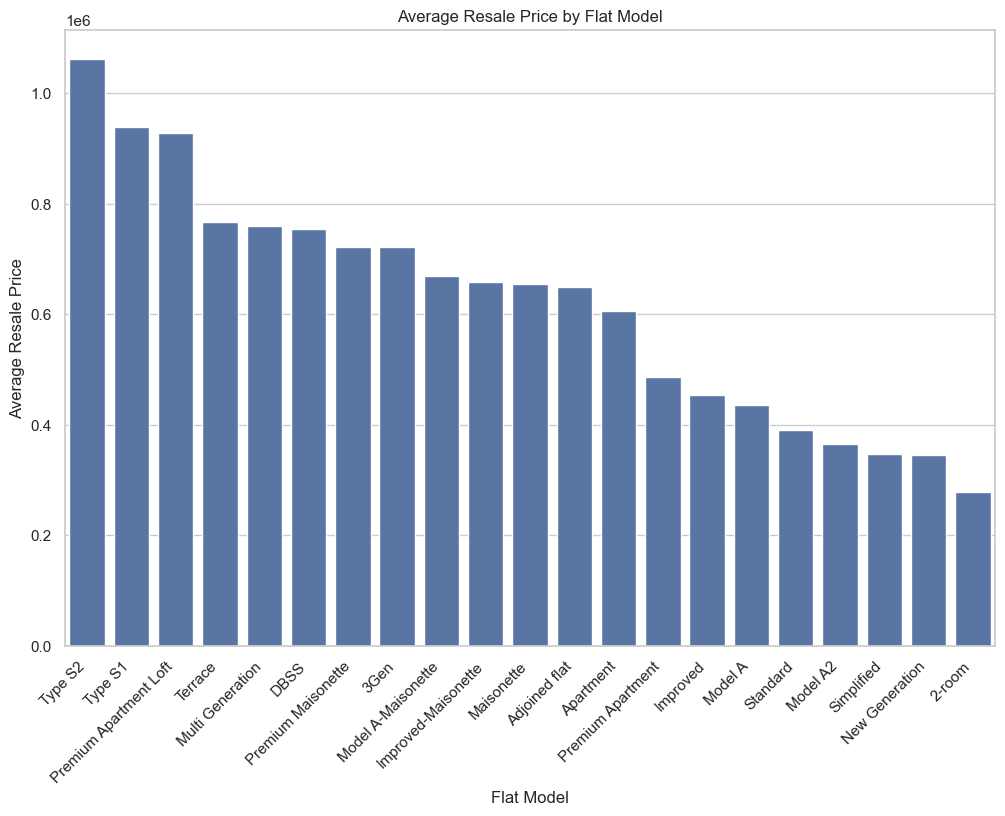

In [51]:
# calculate avg price for each flat_model
average_price = data_hdb_last15.groupby('flat_model')['resale_price'].mean().reset_index()

# sort
average_price = average_price.sort_values(by='resale_price', ascending=False)

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='flat_model', y='resale_price', data=average_price)
plt.title('Average Resale Price by Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

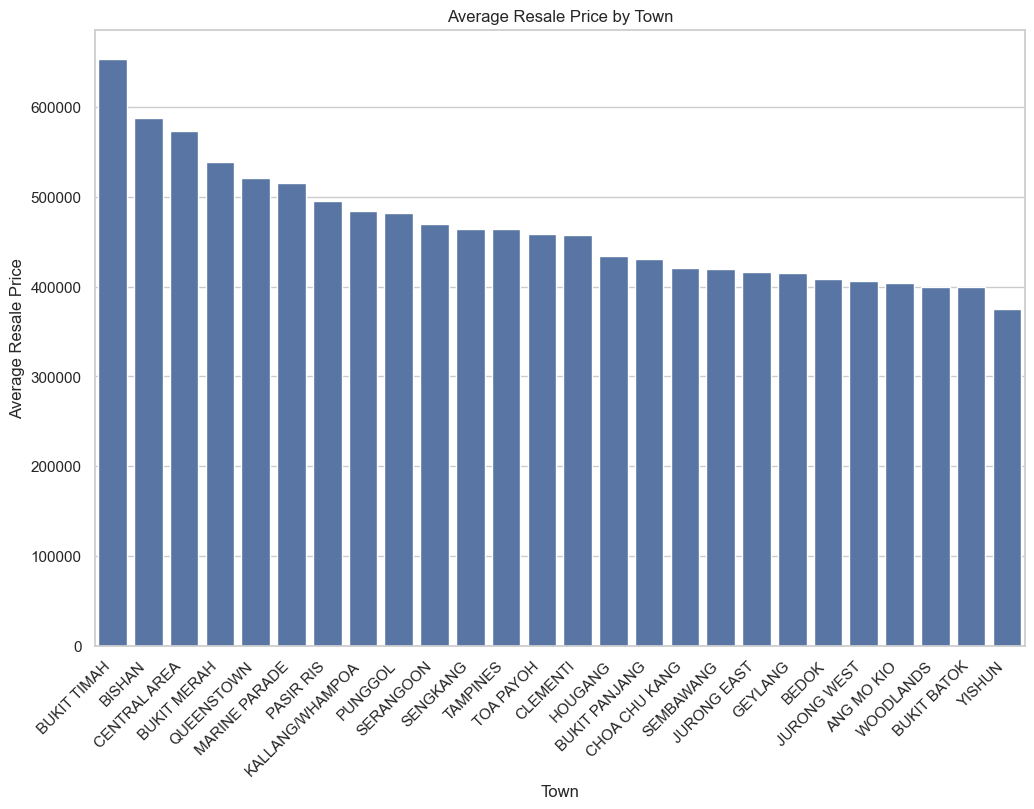

In [52]:
# calculate avg price for each town
average_price = data_hdb_last15.groupby('town')['resale_price'].mean().reset_index()

# sort
average_price = average_price.sort_values(by='resale_price', ascending=False)

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='town', y='resale_price', data=average_price)
plt.title('Average Resale Price by Town')
plt.xlabel('Town')
plt.ylabel('Average Resale Price')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# the remaining_lease column contains text e.g 68 year 08 months
# get the first 2 digits to get the years remaining in lease
# must reset data_hdb_raw each time as remaining_lease column will be a float the 2nd time its run
# data_hdb_raw['remaining_lease'] = data_hdb_raw['remaining_lease'].str[:2].astype(float)

# calculate avg remaining lease for each town
average_remaining_lease = data_hdb_last15.groupby('town')['remaining_lease'].mean().reset_index()

# sort
average_remaining_lease = average_remaining_lease.sort_values(by='remaining_lease', ascending=False)

# size
plt.figure(figsize=(12, 8))

# plot
sns.barplot(x='town', y='remaining_lease', data=average_remaining_lease)
plt.title('Average Remaining Lease by Town')
plt.xlabel('Town')
plt.ylabel('Average Remaining Lease')
plt.xticks(rotation=45, ha='right')
plt.show()

### Saving Dataset

In [ ]:
# Save Cleaned Dataset
# data_hdb_last15.to_csv('../dataset/data_hdb_cleaned', index = False)